In [ ]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() 
from sklearn.cluster import KMeans                   
from sklearn.cluster import AgglomerativeClustering

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kneed          
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Data cleaning**

**We load the data.**

In [ ]:
filename = '/content/drive/My Drive/CV Portfolio/Data/CARS_1.csv'

df = pd.read_csv(filename)
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


**We clean data related to categorical data.**

In [ ]:
def fuel(algo):
  if algo == 'Petrol':
    return int(0)
  elif algo == 'Diesel':
    return int(1) 
  elif algo == 'CNG':
    return int(2) 
  elif algo == 'Electric':
    return int(3) 

def transmission(algo):
  if algo == 'Automatic':
    return int(0)
  elif algo == 'Manual':
    return int(1) 
  elif algo == 'Electric':
    return int(2) 

def body(algo):
  if algo == 'Hatchback':
    return int(0)
  elif algo == 'Wagon':
    return int(1) 
  elif algo == 'SUV':
    return int(2)
  elif algo == 'MUV':
    return int(3) 
  elif algo == 'Sedan':
    return int(4)
  elif algo == 'Hybrid':
    return int(5) 
  elif algo == 'Minivan':
    return int(6)
  elif algo == 'Pickup Truck':
    return int(7) 
  elif algo == 'Coupe':
    return int(8)
  elif algo == 'Convertible':
    return int(9) 
  elif algo == 'Luxury':
    return int(10)

df['fuel'] = df['fuel_type'].apply(fuel)
df['transmission'] = df['transmission_type'].apply(transmission)
df['body'] = df['body_type'].apply(body)

**We choose our features columns.**

In [ ]:
features = ['body', 'transmission','fuel', 'engine_displacement', 'no_cylinder', 'max_power_bhp', 'max_power_rp']

X = df[features].to_numpy()

print('Matrix\'s shape: {}'.format(X.shape))

Matrix's shape: (203, 7)


### **PCA**

We scale the data, fit and transform PCA. Without setting the number of n_componets, the model will assign as many components as features in the dataset.

In [ ]:
std_scale.fit(X)
X_scaled = std_scale.transform(X)

pca = PCA(n_components=None)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('PC\'s shape: {}'.format(X_pca.shape))

PC's shape: (203, 7)


**We plot the first and second components of PCA.**

Text(0, 0.5, 'PC2')

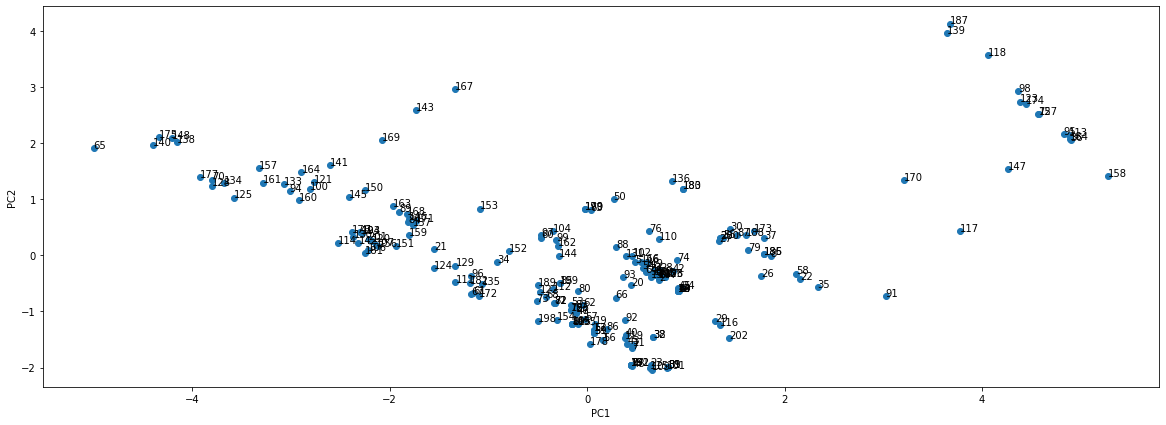

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(X_pca[:, 0], X_pca[:, 1])

for i in range(X_scaled.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

**By exploring the explained variance fraction (that shows the amount of information that provides each component) we can plot the cumulative of the former and say that with thte 2 first componentes we can explain more than 70% the information.**

Text(0.5, 0, 'Number of main components')

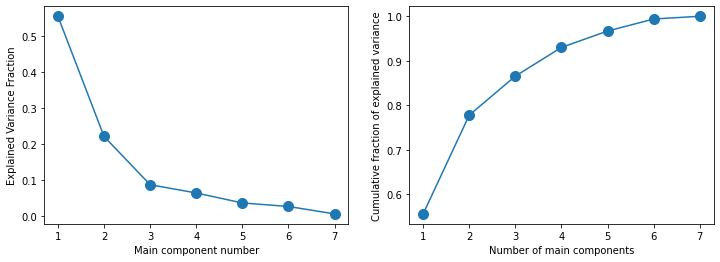

In [ ]:
evr = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Explained Variance Fraction')
ax[0].set_xlabel('Main component number')

cumulative_variance = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), cumulative_variance, '.-', markersize = 20)
ax[1].set_ylabel('Cumulative fraction of explained variance')
ax[1].set_xlabel('Number of main components')

**We can see the information on each component. On PC1 we observe that features like 'engine_displacement', 'no_cylinder' have more weight (absolute number) compared with the others.**

In [ ]:
print('Features = {}'.format(features))
print('PCA1 = {}'.format(np.around(pca.components_[0], 6)))
print('PCA2 = {}'.format(np.around(pca.components_[1], 6)))

Features = ['body', 'transmission', 'fuel', 'engine_displacement', 'no_cylinder', 'max_power_bhp', 'max_power_rp']
PCA1 = [-0.235127  0.35688   0.390825 -0.456146 -0.471264 -0.335815 -0.348823]
PCA2 = [ 0.477245  0.402747  0.413624  0.223528  0.131357  0.479042 -0.377155]


**We plot the PC1 and PC2 field with arrows on the direction of the features. Features like 'transmission', 'fuel, 'max_power_rp' are parallel. We will see how those features explain the group up-right of the plot.**

Text(0, 0.5, 'PC2')

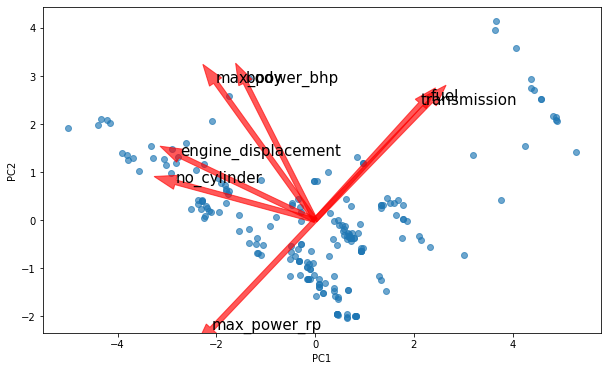

In [ ]:
features_pc = pca.components_.T

fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.65)

sf = 6 
      
for i in range(len(features)):

  ax.arrow(0, 0, sf * features_pc[i][0], sf * features_pc[i][1], width = 0.1, color = 'r', alpha = 0.65)
  ax.text(sf * features_pc[i][0], sf * features_pc[i][1], s = features[i], fontdict= {'color': 'k', 'size': 15})

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### **K-means**

**The are no rules about how many cluster should be per dataset. But using KneeLocator (that sums the total distance to the centroids) we can spot where the slope down is less pronounce. And we choose in this case the number 6 for the number of clusters.**

Text(0, 0.5, 'SSE')

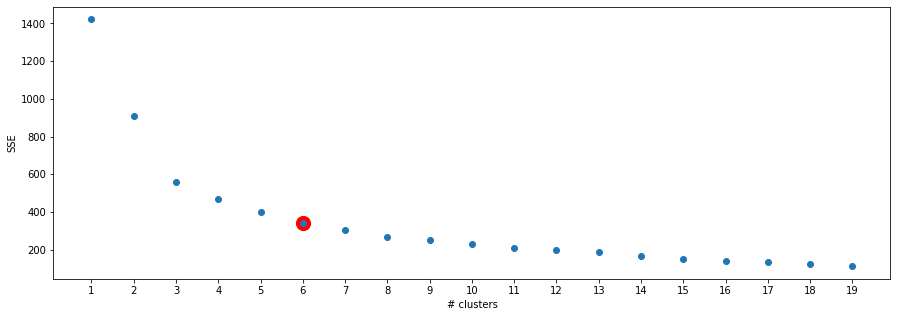

In [ ]:
sse = []

for k in range(1, 20):
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(X_pca)
  sse.append(kkmeans.inertia_)
  
fig, ax = plt.subplots(figsize = (15, 5))

ax.scatter(6, sse[5], color='red', s=200) 

ax.scatter(range(1, 20), sse)            
ax.set_xticks(range(1, 20))
ax.set_xlabel("# clusters")
ax.set_ylabel("SSE")

**We fit the data and get the centroids location.**

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_

**We plot PC1 and PC2 componentes with the centroids and hue colors according to its cluster.**

Text(0, 0.5, 'PC2')

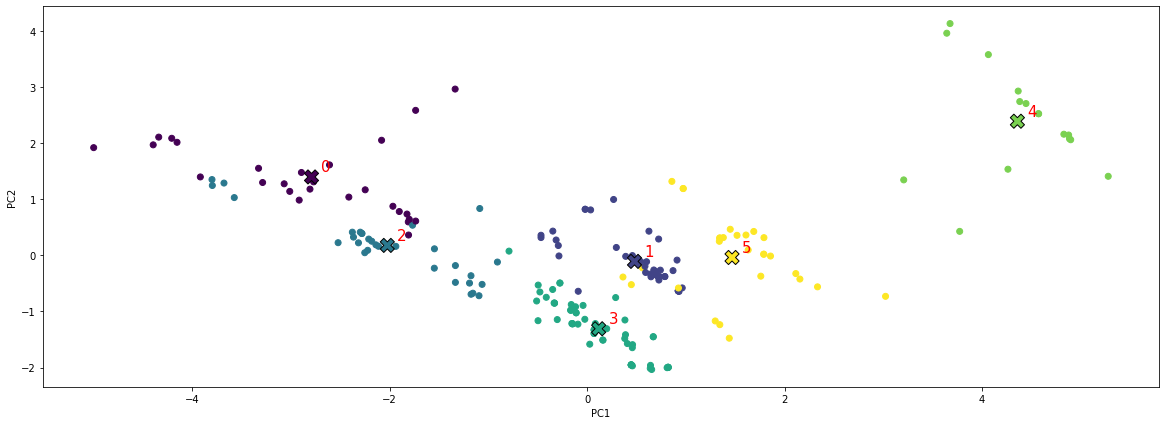

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')

for i in range(np.unique(kmeans.labels_).shape[0]):
  ax.text(centroids[i, 0]+0.1, centroids[i, 1]+0.1, s = i, fontsize=15,color='red')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


**The model identified up - right the cluster number 4. Filtering that cluster we can suppose that the spec of transmission_type = Electric it was a strong factor for the kmeans model.**

In [ ]:
df2 = df.copy()
var_1 = pd.Series(data=kmeans.labels_)
df['K_means_label'] = var_1

features2 = ['car_name', 'body_type', 'transmission_type','fuel_type', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'K_means_label']

df.loc[df['K_means_label']== 4,features2]

,car_name,body_type,transmission_type,fuel_type,max_torque_nm,max_torque_rpm,max_power_bhp,K_means_label
36,Hyundai Kona Electric,SUV,Electric,Electric,395.0,0,134.10,4
75,Kia EV6,SUV,Electric,Electric,605.0,0,320.55,4
95,MG ZS EV,SUV,Electric,Electric,280.0,0,173.83,4
98,BMW i4,Sedan,Electric,Electric,430.0,0,335.25,4
113,BYD E6,MUV,Electric,Electric,180.0,0,93.87,4
117,Mini Cooper SE,Hatchback,Automatic,Electric,270.0,1000,181.03,4
118,Audi e-tron,Coupe,Electric,Electric,664.0,0,300.00,4
123,Porsche Taycan,Wagon,Electric,Electric,650.0,0,482.76,4
127,BMW iX,SUV,Electric,Electric,630.0,0,321.84,4
139,Mercedes-Benz EQS,Sedan,Electric,Electric,1020.0,0,750.97,4
